In [2]:

import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Add a channel dimension (grayscale images)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Check dataset shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


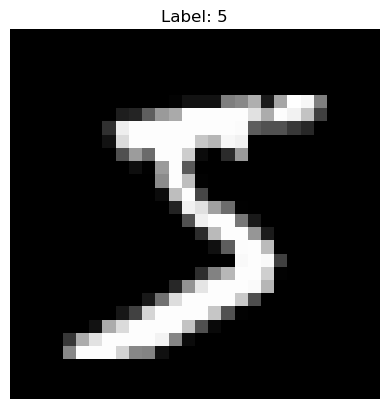

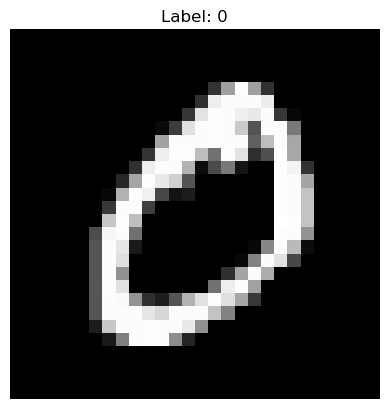

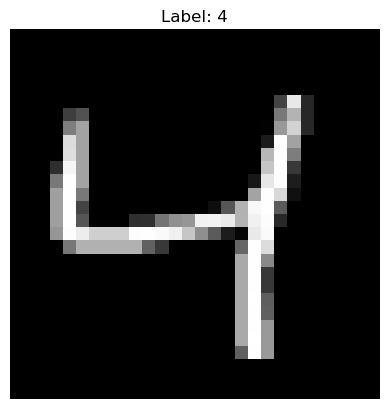

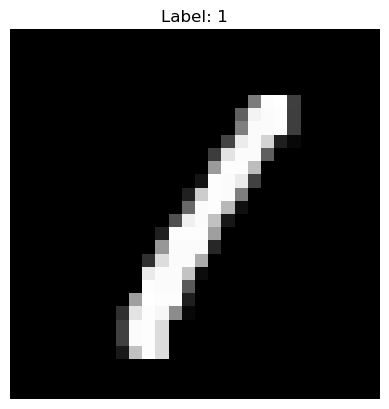

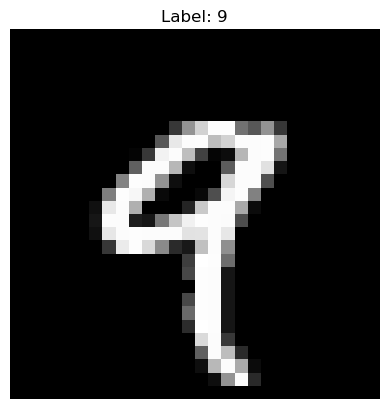

In [4]:
# Display a few images with their labels
for i in range(5):
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()


In [5]:
# Define the CNN architecture
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps and add dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Display the model architecture
model.summary()


C:\Users\kisho\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64, verbose=1)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8688 - loss: 0.4301 - val_accuracy: 0.9785 - val_loss: 0.0771
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9807 - loss: 0.0625 - val_accuracy: 0.9848 - val_loss: 0.0525
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9882 - loss: 0.0368 - val_accuracy: 0.9858 - val_loss: 0.0481
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9873 - val_loss: 0.0400
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9936 - loss: 0.0186 - val_accuracy: 0.9887 - val_loss: 0.0405
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.9850 - val_loss: 0.0561
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9963 - loss: 0.0106 - 

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9874 - loss: 0.0459
Test Accuracy: 0.99


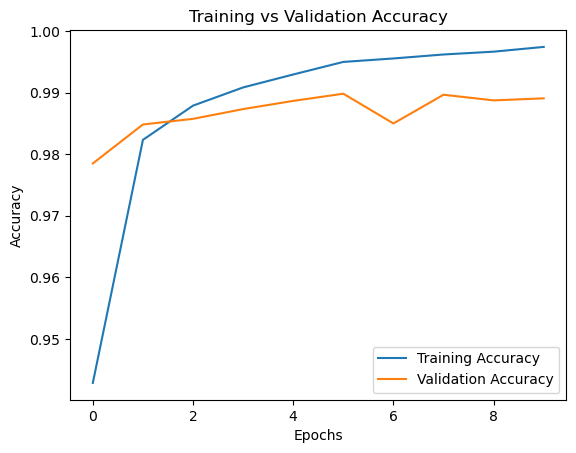

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


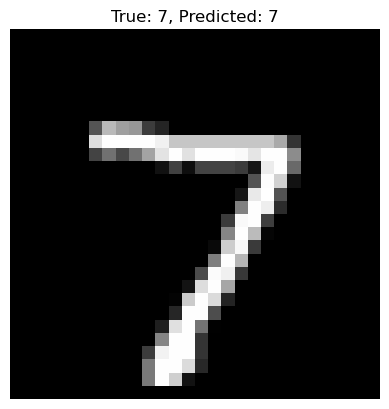

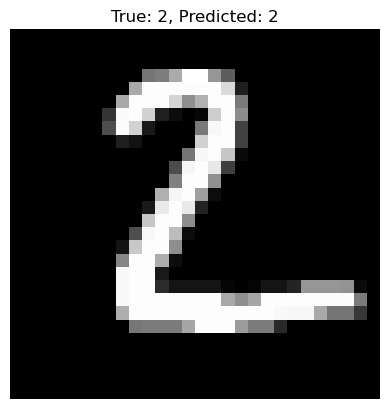

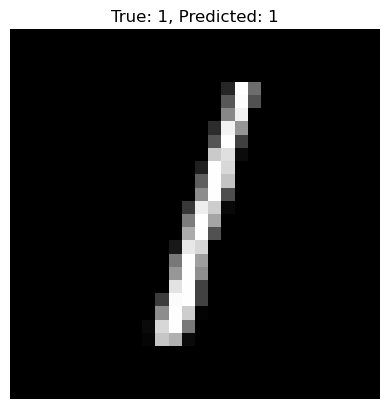

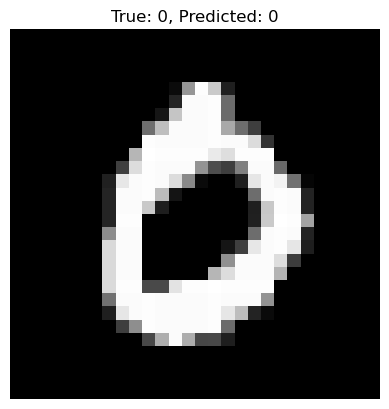

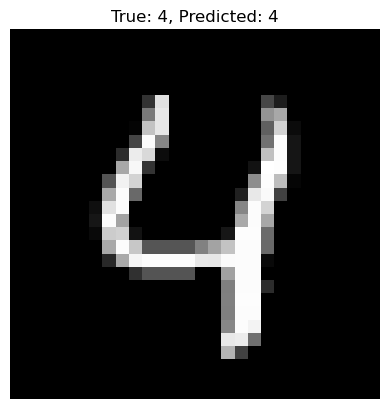

In [10]:
# Make predictions
predictions = model.predict(X_test)

# Display a few test images along with predicted and true labels
for i in range(5):
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


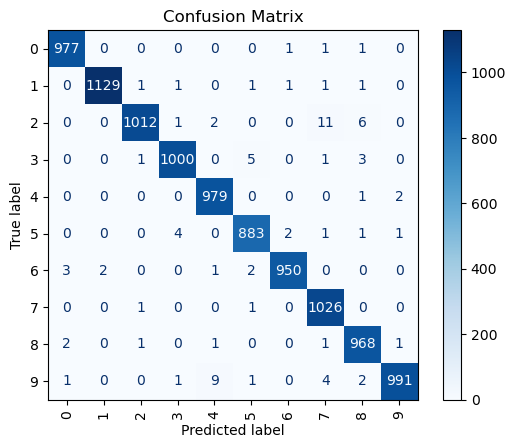

In [11]:
# Generate confusion matrix
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


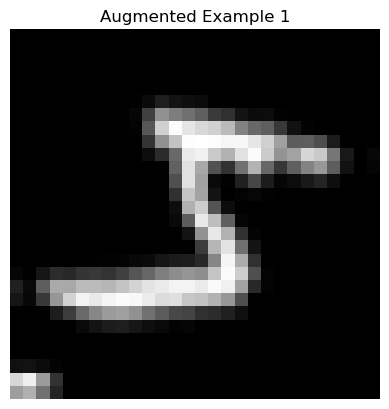

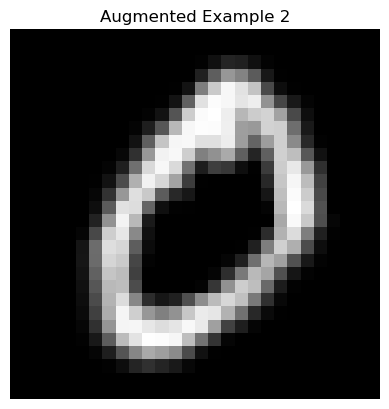

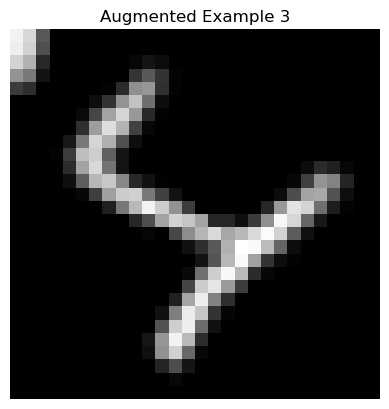

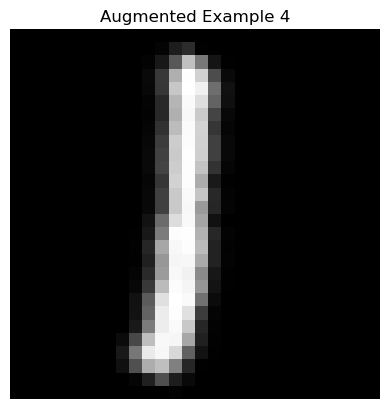

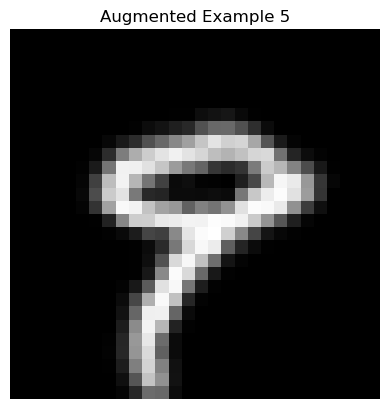

In [13]:
# Define a data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Apply augmentation and visualize results
for i in range(5):
    augmented_image = data_augmentation(X_train[i:i+1]).numpy().squeeze()
    plt.imshow(augmented_image, cmap='gray')
    plt.title(f"Augmented Example {i+1}")
    plt.axis('off')
    plt.show()


In [ ]:
pip install tensorflow h5py


In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and add RGB channels
X_train = np.stack([X_train] * 3, axis=-1) / 255.0
X_test = np.stack([X_test] * 3, axis=-1) / 255.0

# Resize to smaller size (e.g., 64x64 instead of 224x224)
X_train = tf.image.resize(X_train, [64, 64])
X_test = tf.image.resize(X_test, [64, 64])

# Load pre-trained VGG16 model (without top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze pre-trained layers

# Add custom layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Fewer neurons for faster computation
    layers.Dropout(0.3),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train for fewer epochs
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=128)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1449s 4s/step - accuracy: 0.7661 - loss: 0.7992 - val_accuracy: 0.9697 - val_loss: 0.1107
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1546s 4s/step - accuracy: 0.9535 - loss: 0.1654 - val_accuracy: 0.9772 - val_loss: 0.0722
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2486s 7s/step - accuracy: 0.9678 - loss: 0.1108 - val_accuracy: 0.9812 - val_loss: 0.0586
313/313 ━━━━━━━━━━━━━━━━━━━━ 168s 537ms/step - accuracy: 0.9778 - loss: 0.0660
Test Accuracy: 0.98
